## Start


In this EDA we will mainly focus on the variables that influence the sellingtime

In [1]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
#Reading File path
import os
os.chdir('/Users/pim/Downloads') 
os.getcwd()

'/Users/pim/Downloads'

In [2]:
#creating dataframe
funda = pd.read_csv('housing_data.csv')
funda.shape

(211617, 17)

In [3]:
#Show first 5 rows of the data set for visualization
funda.head()

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
0,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",<{woonboot}> <{vrijstaande woning}>,<{Woonhuis}>,1971-1980,1,NaN,09F114F5C5EC061F6230349892132149,3,NaN,NaN,4388064,62,2018-11-12
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1980,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,1.0,B,4388200,136,2018-08-30
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,2001-2010,0,NaN,E983FEDC63D87BF61AE952D181C8FD17,3,NaN,NaN,4399344,70,2018-11-23
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,<{Woonhuis}>,1973,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,NaN,NaN,4400638,144,2018-12-14
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,<{woonboerderij}> <{vrijstaande woning}>,<{Woonhuis}>,1900,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,1.0,NaN,4401765,323,2018-12-06


Let's convert the publicatieDatum and datum_ondertekening column into a 'sellingdays' column so we can use it.

In [4]:
#add selling days
funda['selling_days'] = pd.to_datetime(funda['datum_ondertekening']) - pd.to_datetime(funda['publicatieDatum'])
funda['selling_days'] = funda['selling_days'].dt.days.astype('int16')
funda['selling_days'] = np.where(funda['selling_days'] < 0, 0, funda['selling_days'])
funda

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening,selling_days
0,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",<{woonboot}> <{vrijstaande woning}>,<{Woonhuis}>,1971-1980,1,NaN,09F114F5C5EC061F6230349892132149,3,NaN,NaN,4388064,62,2018-11-12,104
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1980,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,1.0,B,4388200,136,2018-08-30,0
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,2001-2010,0,NaN,E983FEDC63D87BF61AE952D181C8FD17,3,NaN,NaN,4399344,70,2018-11-23,113
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,<{Woonhuis}>,1973,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,NaN,NaN,4400638,144,2018-12-14,132
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,<{woonboerderij}> <{vrijstaande woning}>,<{Woonhuis}>,1900,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,1.0,NaN,4401765,323,2018-12-06,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211612,4613507,2018-12-31,9791GD,159000.0,Ruime eengezinswoning aangeboden aan de rand v...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1974,1,195.0,AB928B88F4860C427BB7C6A27D6F2642,5,NaN,NaN,4613507,116,2019-03-07,66
211613,4613532,2018-12-31,6431GT,179000.0,Nabij centrum van Hoensbroek met al haar voorz...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,<{Woonhuis}>,1995,1,160.0,4271E4C370DF497EE3BB23B3AED3E292,4,1.0,NaN,4613532,84,2019-01-17,17
211614,4613537,2018-12-31,4051EW,391500.0,Ook de kans aangrijpen om te mogen wonen in de...,<{bungalow}> <{vrijstaande woning}> (<{semi-bu...,<{Woonhuis}>,1948,1,465.0,AB928B88F4860C427BB7C6A27D6F2642,5,NaN,NaN,4613537,99,2019-08-03,215
211615,4613566,2018-12-31,4043GG,375000.0,"BIEDEN VANAF € 375.000,= kosten koper\nHet uit...",<{eengezinswoning}> <{2-onder-1-kapwoning}>,<{Woonhuis}>,2006,1,300.0,59A3951B92EB2334DC7295CEEA0FB547,7,1.0,A,4613566,172,2019-04-08,98


In [5]:
#Show datatypes
funda.dtypes

globalId                   int64
publicatieDatum           object
postcode                  object
koopPrijs                float64
volledigeOmschrijving     object
soortWoning               object
categorieObject           object
bouwjaar                  object
indTuin                    int64
perceelOppervlakte       float64
kantoor_naam_MD5hash      object
aantalKamers               int64
aantalBadkamers          float64
energielabelKlasse        object
globalId.1                 int64
oppervlakte                int64
datum_ondertekening       object
selling_days               int16
dtype: object

In [6]:
funda.describe()

,globalId,koopPrijs,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,globalId.1,oppervlakte,selling_days
count,2.116170e+05,2.108760e+05,211617.000000,144376.000000,211617.000000,150469.000000,2.116170e+05,211617.000000,211617.000000
mean,4.313045e+06,3.213849e+05,0.707916,552.150482,4.656067,1.110927,4.313045e+06,120.083216,61.839640
std,1.658150e+05,2.028539e+05,0.454722,2662.228965,1.582507,0.347859,1.658150e+05,49.580312,71.163986
min,2.567727e+06,2.150000e+02,0.000000,10.000000,1.000000,1.000000,2.567727e+06,1.000000,0.000000
25%,4.173352e+06,2.000000e+05,0.000000,143.000000,4.000000,1.000000,4.173352e+06,90.000000,19.000000
50%,4.269237e+06,2.750000e+05,1.000000,208.000000,5.000000,1.000000,4.269237e+06,115.000000,33.000000
75%,4.458446e+06,3.750000e+05,1.000000,347.000000,5.000000,1.000000,4.458446e+06,140.000000,77.000000
max,4.613566e+06,9.950000e+06,1.000000,312195.000000,41.000000,8.000000,4.613566e+06,3210.000000,621.000000


In [7]:
#Check for null-values
funda.isnull().sum()

globalId                      0
publicatieDatum               0
postcode                      0
koopPrijs                   741
volledigeOmschrijving         0
soortWoning                   0
categorieObject               0
bouwjaar                      0
indTuin                       0
perceelOppervlakte        67241
kantoor_naam_MD5hash          0
aantalKamers                  0
aantalBadkamers           61148
energielabelKlasse       122755
globalId.1                    0
oppervlakte                   0
datum_ondertekening           0
selling_days                  0
dtype: int64

Our set contains a bunch of null-values, we will clean those later


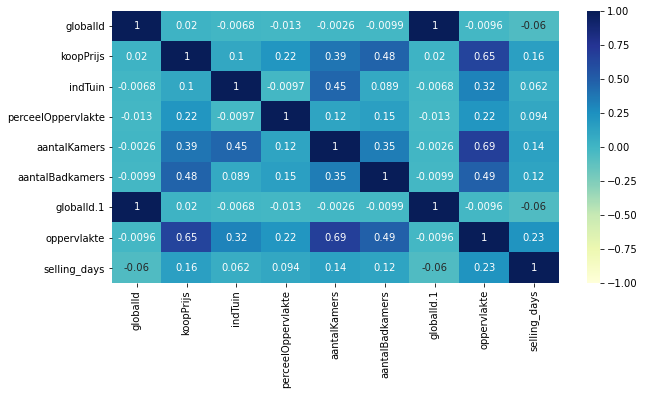

In [8]:
#Check if there is an correlation between all numerical variables and the sellingtime
plt.figure(figsize=(10,5))
corr = funda.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True , cmap="YlGnBu")
plt.show()

According to the correlation heatmap, 'oppervlakte', 'aantalKamers', 'koopPrijs' and 'aantalBadkamers' have the highest correlation with 'selling_days' respectively. This means that there is a  positive relationship between the variables with 'selling_days', hence we selected those 4 numerical variables to predict the selling time.


<function matplotlib.pyplot.show(close=None, block=None)>

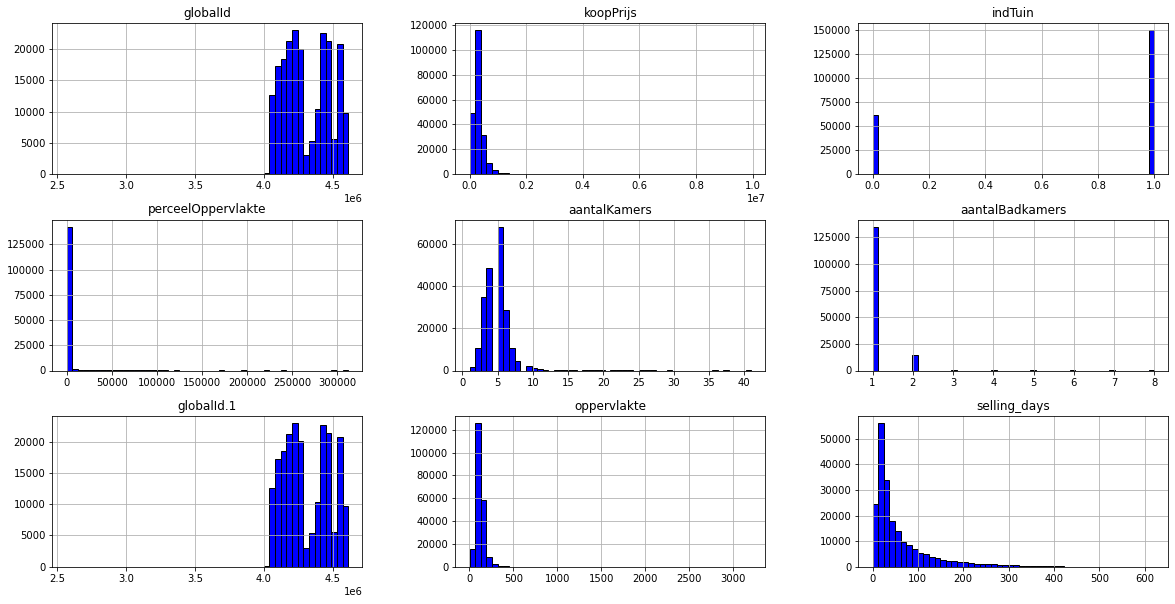

In [9]:
funda.hist(bins = 50, figsize = (20,10), facecolor = 'blue', edgecolor = 'k')
plt.show

## Cleaning the data

In [10]:
funda.dtypes

globalId                   int64
publicatieDatum           object
postcode                  object
koopPrijs                float64
volledigeOmschrijving     object
soortWoning               object
categorieObject           object
bouwjaar                  object
indTuin                    int64
perceelOppervlakte       float64
kantoor_naam_MD5hash      object
aantalKamers               int64
aantalBadkamers          float64
energielabelKlasse        object
globalId.1                 int64
oppervlakte                int64
datum_ondertekening       object
selling_days               int16
dtype: object

Our dataset contains a lot of categorical columns (object) that we also want to include in our supervised learning model. We will do this using dummy encoding in the modelling notebook. Some data contains symbols like {} that we want to get rid of for visualization purposes.

Furthermore, our dataset contains null-values (koopPrijs, perceelOppervlakte, aantalBadkamers and Energielabelklasse) that we want to get rid of. We don't want to drop all those null-values, so we will handle them in a different way that seems most logical to us.

Let's clean!

In [11]:
#Clean categorieObject
funda['categorieObject'] = funda['categorieObject'].replace({'<{':'','}>':''}, regex=True)

In [12]:
#Replace null values in perceelOppervlakte with the median of the type of house
funda_app = funda[funda['categorieObject'] == 'Appartement' ]
funda_house = funda[funda['categorieObject'] == 'Woonhuis']
#Median of perceelOppervlakte of woonhuis
median_house = funda_house['perceelOppervlakte'].median()

#input perceelOppervlakte of appartment with oppervlakte
for row in range(len(funda)):
    if funda['perceelOppervlakte'].isna().iloc[row] == True and funda['categorieObject'].iloc[row] == 'Appartement':
        funda['perceelOppervlakte'].iloc[row] = funda['oppervlakte'].iloc[row]
    elif funda['perceelOppervlakte'].isna().iloc[row] == True and funda['categorieObject'].iloc[row] == 'Woonhuis':
        funda['perceelOppervlakte'].iloc[row] = median_house

#Replace null values in aantalBadkamers with the median
median_badkamers = funda['aantalBadkamers'].median()
for row in range(len(funda)):
    if funda['aantalBadkamers'].isna().iloc[row] == True:
        funda['aantalBadkamers'].iloc[row] = median_badkamers

# We decided to replace all the NULL values for the energylabel with the mode. The mode is energylabel C. Therefore the number of C's increased a lot.
funda['energielabelKlasse'].fillna('C', inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
#Drop null values of koopPrijs, since there are only about 700 null-values
funda_1 = funda.dropna(subset = ['koopPrijs'], axis = 0, inplace = False)

funda_1

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening,selling_days
0,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",<{woonboot}> <{vrijstaande woning}>,Woonhuis,1971-1980,1,208.0,09F114F5C5EC061F6230349892132149,3,1.0,C,4388064,62,2018-11-12,104
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,<{eengezinswoning}> <{tussenwoning}>,Woonhuis,1980,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,1.0,B,4388200,136,2018-08-30,0
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,<{tussenverdieping}> (<{appartement}>),Appartement,2001-2010,0,70.0,E983FEDC63D87BF61AE952D181C8FD17,3,1.0,C,4399344,70,2018-11-23,113
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,Woonhuis,1973,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,1.0,C,4400638,144,2018-12-14,132
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,<{woonboerderij}> <{vrijstaande woning}>,Woonhuis,1900,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,1.0,C,4401765,323,2018-12-06,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211612,4613507,2018-12-31,9791GD,159000.0,Ruime eengezinswoning aangeboden aan de rand v...,<{eengezinswoning}> <{tussenwoning}>,Woonhuis,1974,1,195.0,AB928B88F4860C427BB7C6A27D6F2642,5,1.0,C,4613507,116,2019-03-07,66
211613,4613532,2018-12-31,6431GT,179000.0,Nabij centrum van Hoensbroek met al haar voorz...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,Woonhuis,1995,1,160.0,4271E4C370DF497EE3BB23B3AED3E292,4,1.0,C,4613532,84,2019-01-17,17
211614,4613537,2018-12-31,4051EW,391500.0,Ook de kans aangrijpen om te mogen wonen in de...,<{bungalow}> <{vrijstaande woning}> (<{semi-bu...,Woonhuis,1948,1,465.0,AB928B88F4860C427BB7C6A27D6F2642,5,1.0,C,4613537,99,2019-08-03,215
211615,4613566,2018-12-31,4043GG,375000.0,"BIEDEN VANAF € 375.000,= kosten koper\nHet uit...",<{eengezinswoning}> <{2-onder-1-kapwoning}>,Woonhuis,2006,1,300.0,59A3951B92EB2334DC7295CEEA0FB547,7,1.0,A,4613566,172,2019-04-08,98


In [14]:
#Checking the null values in the cleaned dataset
funda_1.isna().sum()

globalId                 0
publicatieDatum          0
postcode                 0
koopPrijs                0
volledigeOmschrijving    0
soortWoning              0
categorieObject          0
bouwjaar                 0
indTuin                  0
perceelOppervlakte       0
kantoor_naam_MD5hash     0
aantalKamers             0
aantalBadkamers          0
energielabelKlasse       0
globalId.1               0
oppervlakte              0
datum_ondertekening      0
selling_days             0
dtype: int64

Null-values are gone now, perfect!

In [15]:
#pick relevant columns
funda_final_sellingtime = funda_1[['selling_days', 'oppervlakte', 'aantalKamers', 'aantalBadkamers','koopPrijs', 'energielabelKlasse', 'volledigeOmschrijving', 'categorieObject']]

funda_final_sellingtime.head()

,selling_days,oppervlakte,aantalKamers,aantalBadkamers,koopPrijs,energielabelKlasse,volledigeOmschrijving,categorieObject
0,104,62,3,1.0,139000.0,C,"Ruimte, vrijheid, en altijd het water en de we...",Woonhuis
1,0,136,5,1.0,209000.0,B,Verrassend ruime tussenwoning nabij het centru...,Woonhuis
2,113,70,3,1.0,267500.0,C,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Appartement
3,132,144,5,1.0,349000.0,C,Wonen in een zeer royaal bemeten geschakelde 2...,Woonhuis
4,123,323,8,1.0,495000.0,C,Landgoed Junne is een eeuwenoud landgoed en li...,Woonhuis


In [16]:
funda_final_sellingtime.to_csv('funda_time.csv')